In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge ,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV ,LassoCV


In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()







In [3]:
dms = pd.get_dummies(df[["League" ,"Division" ,"NewLeague"]]) 
#bagımsız değişkenlerin bazılarını sayısal değer yapma 
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [4]:
y = df["Salary"] #bagımlı değişken maas
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [5]:
x_ = df.drop(["Salary" , "League" ,"Division" ,"NewLeague"] ,axis = 1).astype("float64")
#bagımsız degisken leri cektik 

In [6]:
x  = pd.concat([x_ , dms[["League_N" ,"Division_W" ,"NewLeague_N"]]] ,axis = 1)
# bagımsız degiskenleri birleştirdik 

In [7]:
x_train ,x_test , y_train , y_test = train_test_split(x , y 
                                                     ,test_size = 0.25
                                                     ,random_state= 42)
# veri setimizi test ve egitim setlerine ayırdık


In [8]:
lasso_model = Lasso().fit(x_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850384, tolerance: 3898.686956380658
  positive)


In [9]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
lasso_model.intercept_

-5.587450677337529

In [11]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [12]:
# farklı lambda değerlerine kasilik katsayilar

lasso = Lasso()
coefs = list()

alphas = np.random.randint(0 ,100000,10)

for a in alphas :
    lasso.setparams(alpha = a )
    lasso.fit(x_train , y_train)
    coefs.append(lasso.coef_)

AttributeError: 'Lasso' object has no attribute 'setparams'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

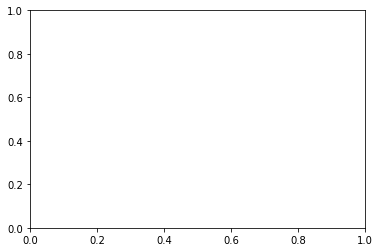

In [13]:
ax = plt.gca()
ax.plot(alphas ,coefs)
ax.set_xscale("log")

TAHMİN


In [ ]:
lasso_model


In [ ]:
lasso_model.predict(x_train)[:5]

In [ ]:
lasso_model.predict(x_test)[:5]

In [ ]:
y_pred = lasso_model.predict(x_test)
np.sqrt(mean_squared_error(y_test , y_pred))

In [67]:
r2_score(y_test , y_pred)

0.3552455512351492

#Model Turning

In [44]:
lasso_cv_model = LassoCV( cv = 10 , max_iter = 100000).fit(x_train , y_train)

In [45]:
lasso_cv_model.alpha_

563.4670501833854

In [46]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(x_train ,y_train)

In [47]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(x_train ,y_train)

In [52]:
y_pred = lasso_tuned.predict(x_test) #karşılıklarını bulma

In [53]:
y_pred

array([ 6.10535272e+02,  5.43913476e+02,  9.11713618e+02,  3.26756002e+02,
        5.44109316e+02,  2.80674523e+02,  5.71528866e+02,  4.91161653e+02,
        8.85685790e+02,  7.79974721e+02,  6.42002934e+02,  1.00892453e+03,
        2.97409456e+02,  5.02473801e+02,  3.54834563e+02,  6.36641961e+02,
        7.54848545e+02,  1.91153655e+02,  9.49499713e+02,  4.05831836e+02,
        4.52695695e+02,  8.08411750e+02,  5.56989038e+02,  4.89358697e+02,
        6.86970514e+02,  1.60786682e+02,  8.25596102e+02,  3.92810788e+02,
        4.58422190e+02,  1.30563114e+02,  2.43713841e+02, -1.40197798e+00,
        3.31197064e+02,  4.22046084e+02,  2.76020686e+02,  5.87356044e+02,
        1.30180648e+03,  3.28634541e+02,  6.85325745e+01,  2.43892554e+02,
        1.03407552e+02,  3.49981097e+02,  6.25880276e+02,  4.80644691e+02,
        8.89766054e+02,  6.53822396e+02,  3.72335060e+02,  3.87037135e+02,
        3.98878873e+02,  6.26073684e+02,  7.31487133e+02,  2.79436669e+02,
        7.32427663e+02,  

In [49]:
np.sqrt(mean_squared_error(y_test , y_pred)) #karşıalartırım mse bulma

373.59572250697937

In [51]:
pd.Series(lasso_tuned.coef_ , index = x_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64